In [ ]:
from google.colab import files
uploaded = files.upload()


Saving PCOS_infertility.csv to PCOS_infertility (1).csv


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
import io

# Assuming your file name is 'your_dataset.csv'
df = pd.read_csv(io.BytesIO(uploaded['PCOS_infertility (1).csv']))
print(df.head())


   Sl. No  Patient File No.  PCOS (Y/N)    I   beta-HCG(mIU/mL)  \
0       1             10001           0                    1.99   
1       2             10002           0                   60.80   
2       3             10003           1                  494.08   
3       4             10004           0                    1.99   
4       5             10005           0                  801.45   

   II    beta-HCG(mIU/mL) AMH(ng/mL)  
0                    1.99       2.07  
1                    1.99       1.53  
2                  494.08       6.63  
3                    1.99       1.22  
4                  801.45       2.26  


           Sl. No  Patient File No.  PCOS (Y/N)    I   beta-HCG(mIU/mL)  \
count  541.000000        541.000000  541.000000              541.000000   
mean   271.000000      10271.000000    0.327172              664.549235   
std    156.317519        156.317519    0.469615             3348.920576   
min      1.000000      10001.000000    0.000000                1.300000   
25%    136.000000      10136.000000    0.000000                1.990000   
50%    271.000000      10271.000000    0.000000               20.000000   
75%    406.000000      10406.000000    1.000000              297.210000   
max    541.000000      10541.000000    1.000000            32460.970000   

       II    beta-HCG(mIU/mL)  
count              541.000000  
mean               238.229518  
std               1603.826221  
min                  0.110417  
25%                  1.990000  
50%                  1.990000  
75%                 97.630000  
max              25000.000000  
Sl. No                    0
Patient 

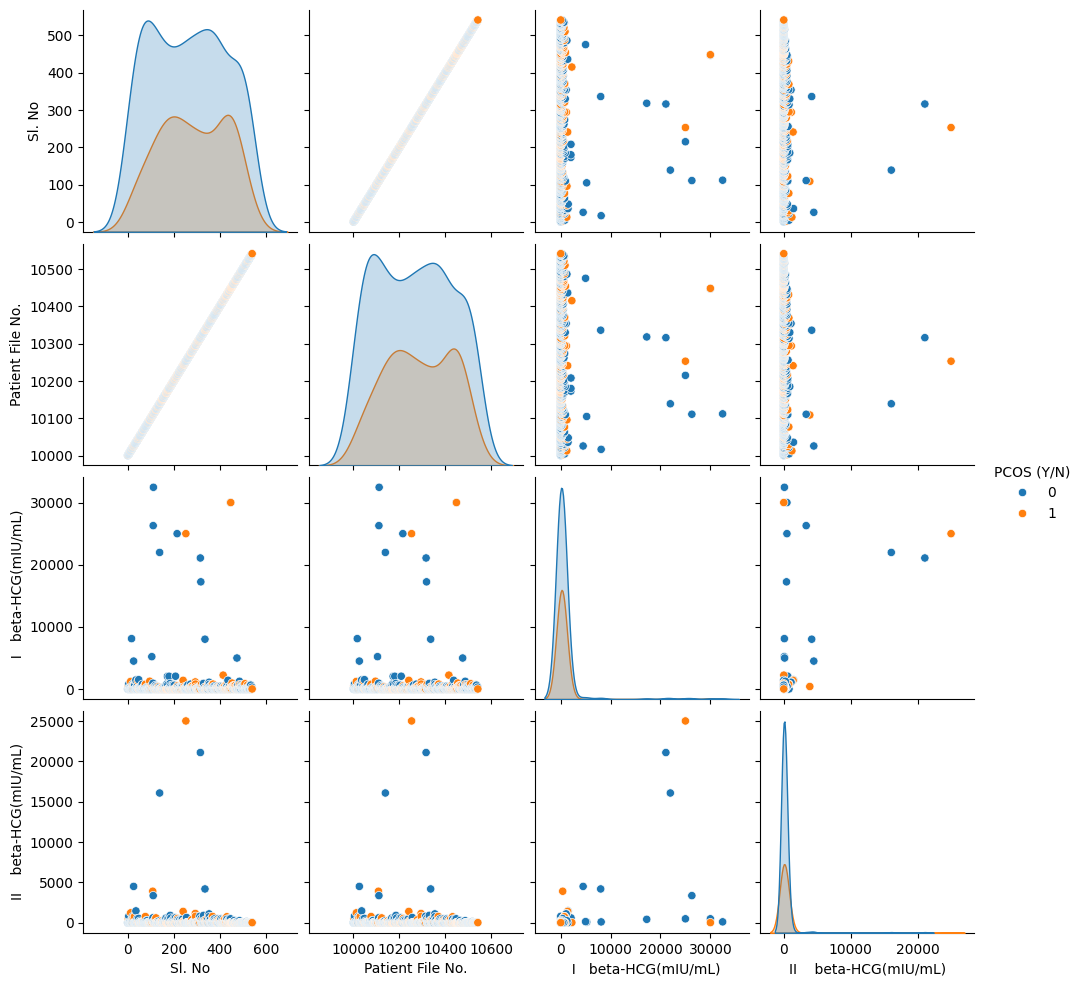

In [ ]:
# Display basic statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize data distributions and relationships
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='PCOS (Y/N)')  # Update 'your_target_column' as per your dataset
plt.show()



In [ ]:
# Identify and encode categorical columns, excluding the target 'PCOS (Y/N)' if it is categorical
categorical_cols = []
for column in df.columns:
    if df[column].dtype == 'object' and column != 'PCOS (Y/N)':  # Check if column is object type and not the target column
        categorical_cols.append(column)

df = pd.get_dummies(df, columns=categorical_cols)

In [ ]:
# Dropping the target variable 'PCOS (Y/N)' and scaling other features
features = df.drop('PCOS (Y/N)', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert scaled features back to DataFrame for better handling later
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

In [ ]:
# Extract the target variable 'PCOS (Y/N)'
target = df['PCOS (Y/N)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset
X = scaled_features
y = df['PCOS (Y/N)']  # update column name
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Initialize and train models
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Evaluate models
from sklearn.metrics import accuracy_score

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} Accuracy: {accuracy_score(y_test, y_pred)}')


Logistic Regression Accuracy: 0.7064220183486238
K-Nearest Neighbors Accuracy: 0.7064220183486238
Decision Tree Accuracy: 0.7431192660550459
Random Forest Accuracy: 0.7155963302752294
Support Vector Machine Accuracy: 0.7247706422018348


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


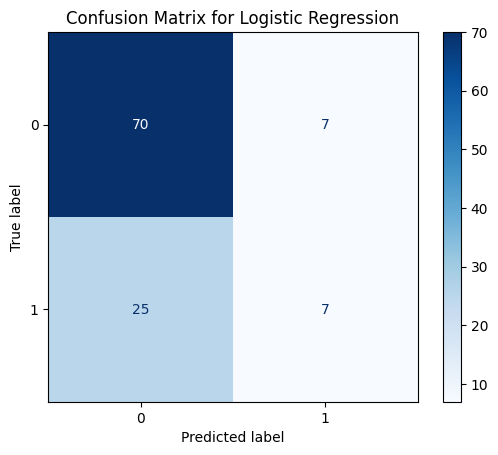

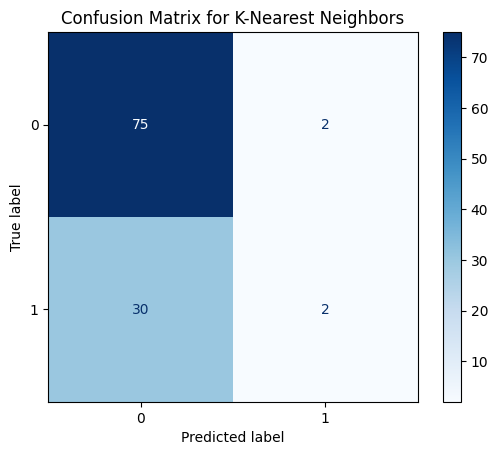

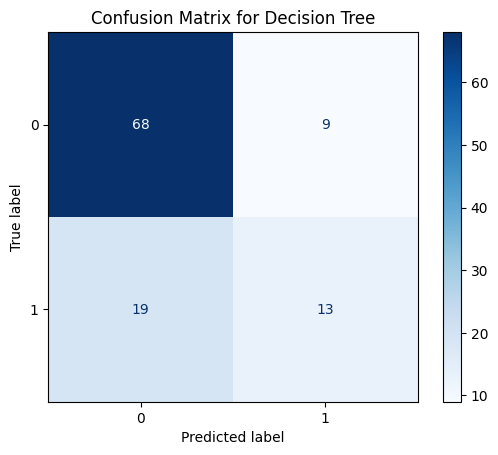

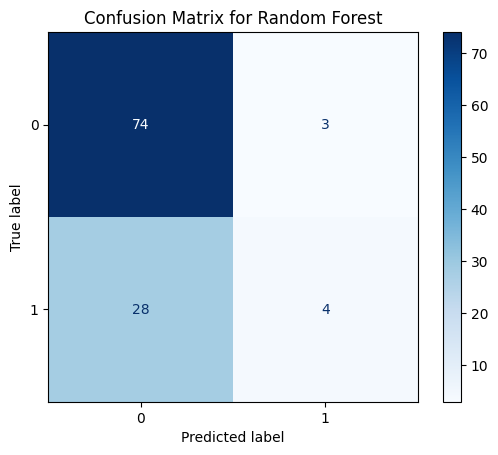

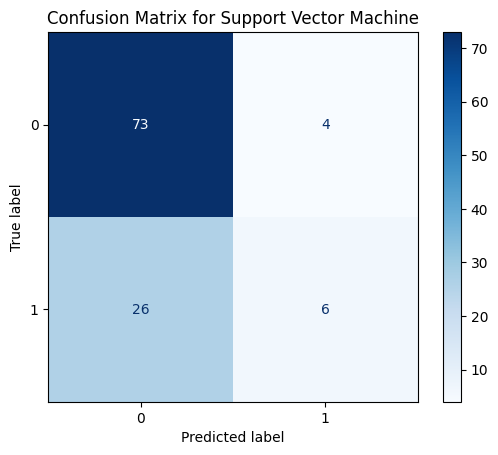

In [ ]:
import matplotlib.pyplot as plt

# Assuming X_test, y_test are already defined and available
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

    # Plot the confusion matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()


# XL DATA

# Step 1: Uploading the Excel File to Google Colab

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving pcos_data.xlsx to pcos_data.xlsx


# Step 2: Read the Excel File

In [ ]:
import pandas as pd
import io

# Assuming the file name is 'pcos_data.xlsx'
xlsx_file = io.BytesIO(uploaded['pcos_data.xlsx'])
df = pd.read_excel(xlsx_file)  # Add `sheet_name='your_sheet_name'` if it's not the first sheet

# Check the first few rows to confirm successful loading
print(df.head())


   Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   

    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  19.3           15                78                22  ...   
1   NaN           15                74                20  ...   
2   NaN           11                72                18  ...   
3   NaN           13                72                20  ...   
4   NaN           11                72                18  ...   

   Fast food (Y/N)  Reg.Exercise(Y/N)  BP _Systolic (mmHg)  \
0              1.0                  0                  110  

# Step 3: Data Preprocessing


In [ ]:
# Handling missing values by filling them with the mean for numeric columns
for col in df.select_dtypes(include=['number']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Encode categorical variables
df = pd.get_dummies(df)

# Scale features, excluding the target 'PCOS (Y/N)'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = df.drop('PCOS (Y/N)', axis=1)  # Replace 'PCOS (Y/N)' with your actual target column name if different
scaled_features = scaler.fit_transform(features)
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

# Extract the target variable
target = df['PCOS (Y/N)']


# Step 4: Splitting the Data into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features_df, target, test_size=0.2, random_state=42)


# Step 5: Model Training and Evaluation

Logistic Regression Accuracy: 0.8899082568807339


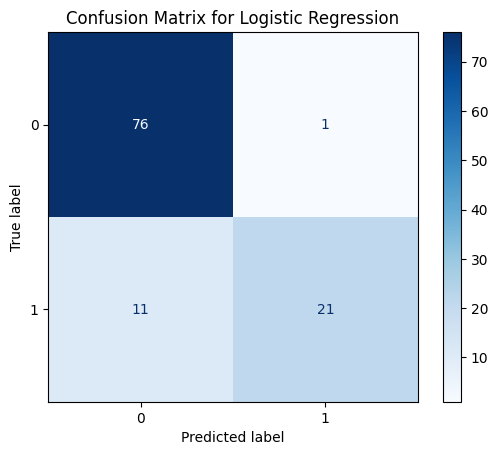

K-Nearest Neighbors Accuracy: 0.7064220183486238


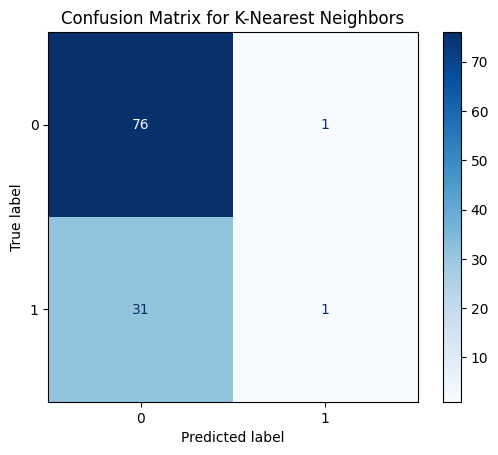

Decision Tree Accuracy: 0.8440366972477065


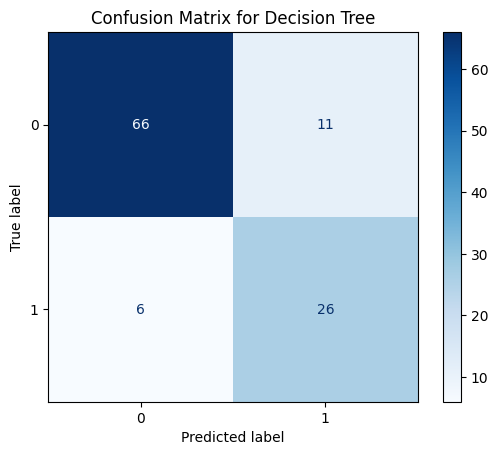

Random Forest Accuracy: 0.8623853211009175


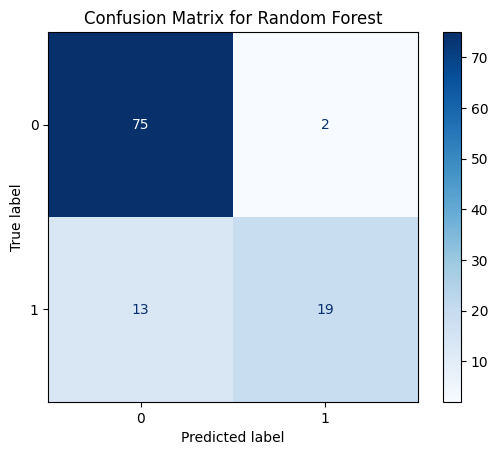

Support Vector Machine Accuracy: 0.7798165137614679


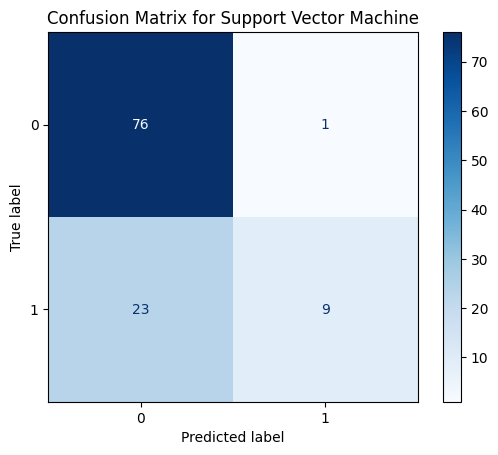

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} Accuracy: {accuracy_score(y_test, y_pred)}')
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()


# SAVING THE MODEL

In [ ]:
import joblib

for name, model in models.items():
    joblib.dump(model, f'{name}_pcos_model.pkl')


In [ ]:
from sklearn.metrics import f1_score


In [ ]:
# Dictionary to hold predictions
predictions = {}

for name, model in models.items():
    predictions[name] = model.predict(X_test)


In [ ]:
f1_scores = {}

for name, prediction in predictions.items():
    f1_scores[name] = f1_score(y_test, prediction, average='weighted')

print("F1 Scores for each model:")
for name, score in f1_scores.items():
    print(f"{name}: {score:.4f}")


F1 Scores for each model:
Logistic Regression: 0.8831
K-Nearest Neighbors: 0.6008
Decision Tree: 0.8471
Random Forest: 0.8527
Support Vector Machine: 0.7359


In [ ]:
import joblib

for name, model in models.items():
    joblib.dump(model, f'{name}_pcos_model.pkl')


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

# Assuming you have y_test and predictions
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Extracting TP, TN, FP, FN
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
specificity = TN / (TN + FP)
f1 = f1_score(y_test, y_pred)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.7798
Precision: 0.9000
Recall: 0.2812
Specificity: 0.9870
F1 Score: 0.4286


Logistic Regression Accuracy: 0.8899
Logistic Regression Precision: 0.9545
Logistic Regression Recall: 0.6562
Logistic Regression Specificity: 0.9870
Logistic Regression F1 Score: 0.7778


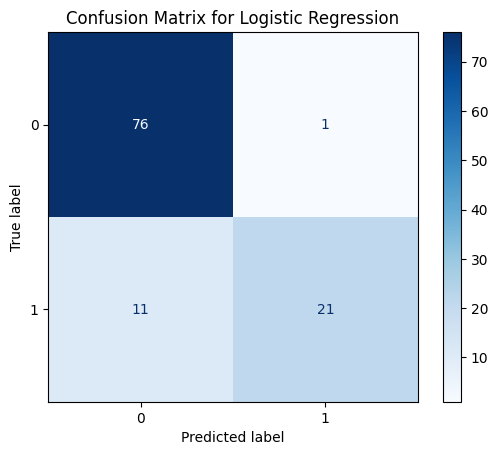

K-Nearest Neighbors Accuracy: 0.7064
K-Nearest Neighbors Precision: 0.5000
K-Nearest Neighbors Recall: 0.0312
K-Nearest Neighbors Specificity: 0.9870
K-Nearest Neighbors F1 Score: 0.0588


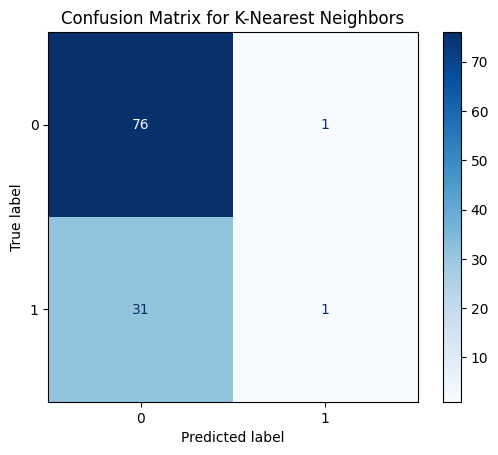

Decision Tree Accuracy: 0.8349
Decision Tree Precision: 0.6944
Decision Tree Recall: 0.7812
Decision Tree Specificity: 0.8571
Decision Tree F1 Score: 0.7353


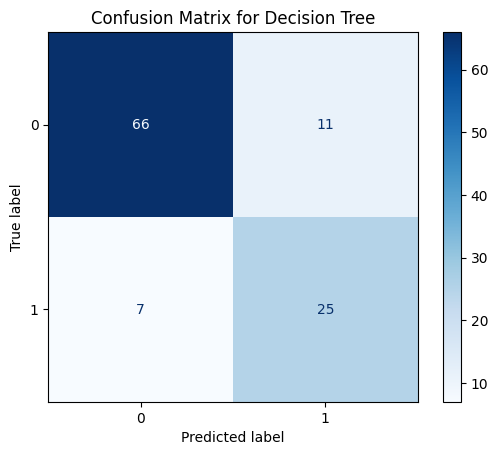

Random Forest Accuracy: 0.8624
Random Forest Precision: 0.9048
Random Forest Recall: 0.5938
Random Forest Specificity: 0.9740
Random Forest F1 Score: 0.7170


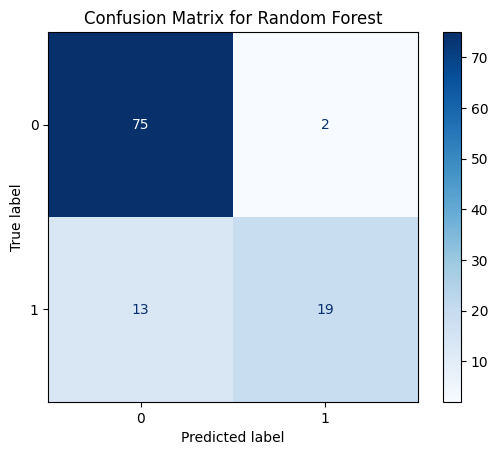

Support Vector Machine Accuracy: 0.7798
Support Vector Machine Precision: 0.9000
Support Vector Machine Recall: 0.2812
Support Vector Machine Specificity: 0.9870
Support Vector Machine F1 Score: 0.4286


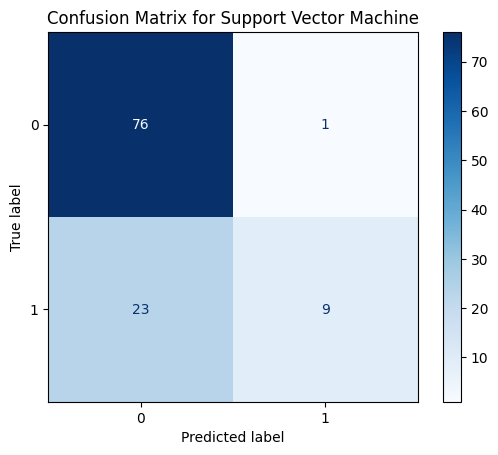

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate confusion matrix and other statistics
    cm = confusion_matrix(y_test, y_pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)  # Handle zero division for precision
    recall = recall_score(y_test, y_pred)
    specificity = TN / (TN + FP)  # Specificity calculation
    f1 = f1_score(y_test, y_pred)

    # Print metrics
    print(f'{name} Accuracy: {accuracy:.4f}')
    print(f'{name} Precision: {precision:.4f}')
    print(f'{name} Recall: {recall:.4f}')
    print(f'{name} Specificity: {specificity:.4f}')
    print(f'{name} F1 Score: {f1:.4f}')

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()
